## Handwritten Digit classification model

In [1]:
import pandas as pd


In [3]:
data=pd.read_csv('train_msint.csv')


In [4]:
data.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
data["labels"]=data[data.columns[0]]


In [7]:
data.drop("label",axis=1,inplace=True)


In [8]:
data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [9]:
data.columns


Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'labels'],
      dtype='object', length=785)

In [10]:
data.shape

(42000, 785)

In [11]:
import matplotlib.pyplot as plt


In [12]:
data['labels'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: labels, dtype: int64

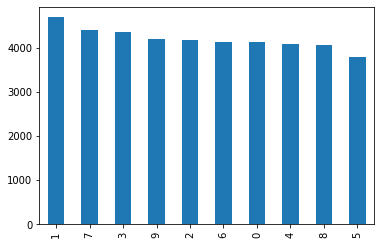

In [13]:
#dataset is balanced
data_check = data['labels'].value_counts().plot(kind='bar')

In [14]:
x = data.drop(['labels'], axis = 1, inplace = False)
y = data['labels']

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [17]:
array = x.values 
min_max_scale = MinMaxScaler()
x_scaled = min_max_scale.fit_transform(array)
x = pd.DataFrame(x_scaled)

In [18]:
x_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
para={"C":[1,0.9,0.8],
    "random_state":[100,50,200,350,50],
     "max_iter":[100,150,130,200,300,80],
     "verbose":[10,20,30,50,25],
     "n_jobs":[-1,2,3]}

# Decision Tree

In [21]:
para={"criterion":["gini","entropy"],
     "max_depth":[5,8,10,12,15,],
     "min_samples_leaf":[5,10,15],
     "max_features":[5,8,10]}

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,classification_report

In [23]:
dt=DecisionTreeClassifier()

In [24]:
gsc=GridSearchCV(dt,para,cv=5)

In [25]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 10, 12, 15],
                         'max_features': [5, 8, 10],
                         'min_samples_leaf': [5, 10, 15]})

In [26]:
gsc.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 5}

In [27]:
dt=DecisionTreeClassifier(min_samples_leaf= 5, max_features= 10, max_depth= 15, criterion= 'gini')

In [28]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, max_features=10, min_samples_leaf=5)

In [29]:
y_pre=dt.predict(x_test)

In [30]:
y_pre

array([1, 5, 2, ..., 8, 8, 8], dtype=int64)

In [32]:
# Checking the performance
print(accuracy_score(y_test,y_pre))
print(classification_report(y_test,y_pre))

0.7588095238095238
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       853
           1       0.91      0.94      0.93       940
           2       0.72      0.74      0.73       835
           3       0.70      0.72      0.71       873
           4       0.72      0.71      0.71       829
           5       0.62      0.65      0.64       731
           6       0.82      0.80      0.81       800
           7       0.78      0.82      0.80       850
           8       0.72      0.64      0.68       846
           9       0.68      0.67      0.68       843

    accuracy                           0.76      8400
   macro avg       0.75      0.76      0.75      8400
weighted avg       0.76      0.76      0.76      8400



# Random Forest

* Randomaized search CV

In [34]:
para={"criterion":["gini","entropy"],
     "max_depth":[3,7,9,5,10],
     "min_samples_split":[5,10,2,4,6],
     "max_features":("sqrt","auto")
     }

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,classification_report

In [36]:
rfc=RandomForestClassifier()

In [37]:
rcv=RandomizedSearchCV(dt,para,n_iter=100,cv=5)

In [38]:
rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=15,
                                                    max_features=10,
                                                    min_samples_leaf=5),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 7, 9, 5, 10],
                                        'max_features': ('sqrt', 'auto'),
                                        'min_samples_split': [5, 10, 2, 4, 6]})

In [39]:
rcv.best_params_

{'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [40]:
rcv.best_score_

0.7917857142857143

In [41]:
rfc=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=50,min_samples_split= 10, max_features="auto", max_depth= 10,
 criterion= 'entropy')

In [42]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       n_estimators=50, n_jobs=-1, random_state=50)

In [43]:
y_pred=rfc.predict(x_test)

In [44]:
y_pred

array([1, 5, 2, ..., 8, 8, 8], dtype=int64)

In [45]:
# Checking the performance of the model
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9426190476190476
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       853
           1       0.97      0.98      0.97       940
           2       0.94      0.95      0.95       835
           3       0.94      0.90      0.92       873
           4       0.94      0.93      0.93       829
           5       0.93      0.93      0.93       731
           6       0.96      0.97      0.97       800
           7       0.95      0.93      0.94       850
           8       0.92      0.93      0.92       846
           9       0.89      0.92      0.91       843

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



In [47]:
cfm = confusion_matrix(y_test,y_pred)

In [48]:
cfm

array([[834,   0,   3,   0,   2,   0,   5,   1,   8,   0],
       [  0, 920,   3,   9,   0,   4,   1,   0,   3,   0],
       [  4,   3, 790,   5,   6,   0,   8,   9,   8,   2],
       [  2,   4,  18, 790,   3,  24,   1,   8,  18,   5],
       [  0,   0,   2,   1, 769,   0,   6,   3,   4,  44],
       [  6,   4,   1,  19,   2, 679,   4,   3,   8,   5],
       [  3,   0,   1,   0,   4,   6, 780,   1,   5,   0],
       [  1,   6,  16,   0,  10,   0,   0, 790,   2,  25],
       [  2,  10,   1,   9,   6,  10,   5,   2, 787,  14],
       [  2,   2,   1,  10,  19,   5,   0,  12,  13, 779]], dtype=int64)